# Mushroom Edibility Classification Analysis
### In this analysis, we explore a dataset of mushrooms to classify them as edible or poisonous based on certain features. We focus on three main attributes: edibility, odor, and cap color. The dataset is taken from the UCI Machine Learning Repository. We will use pandas for data manipulation, seaborn, and matplotlib for visualization. Our goal is to understand the relationship between these features and mushroom edibility.

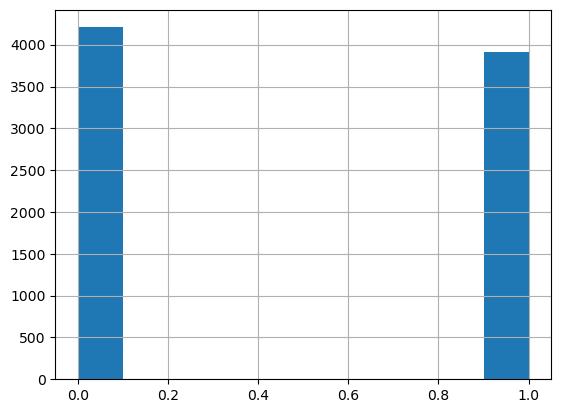

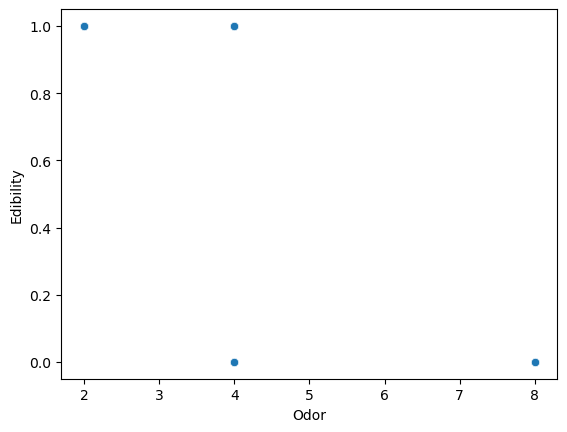

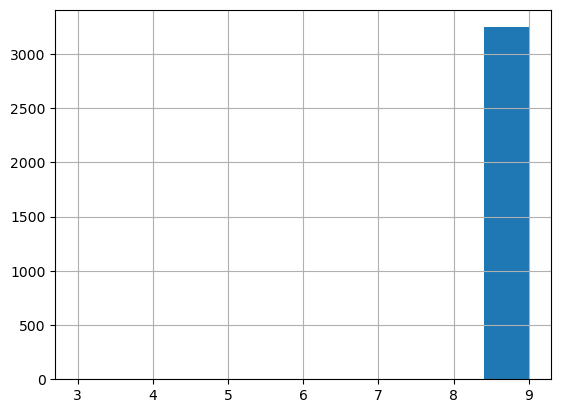

In [2]:
import pandas as pd

file_path = r'C:\Users\Victor Pessoa\Downloads\mushroom\agaricus-lepiota.data'

df = pd.read_csv(file_path, header=None)

df = df.iloc[:, [0, 1, 2]]  
df.columns = ['Edibility', 'Odor', 'Cap_Color']

df['Edibility'] = df['Edibility'].map({'e': 0, 'p': 1})
df['Odor'] = df['Odor'].map({'a': 0, 'l': 1, 'c': 2, 'y': 3, 'f': 4, 'm': 5, 'n': 6, 'p': 7, 's': 8})

cap_color_mapping = {
    'n': 0, 'b': 1, 'c': 2, 'g': 3, 'r': 4, 
    'p': 5, 'u': 6, 'e': 7, 'w': 8, 'y': 9
}
df['Cap_Color'] = df['Cap_Color'].map(cap_color_mapping)

import matplotlib.pyplot as plt
import seaborn as sns

df['Edibility'].hist()
plt.show()

sns.scatterplot(data=df, x='Odor', y='Edibility')
plt.show()

df['Cap_Color'].hist()
plt.show()

## Conclusions
#### From our exploratory data analysis, we observed distinct patterns in the distribution of mushroom edibility based on odor and cap color. The visualizations indicate potential relationships between these features and whether a mushroom is edible or poisonous. Further analysis with machine learning models could provide more insights and accurately predict mushroom edibility. This exploratory analysis lays the groundwork for such advanced predictive modeling.

In [3]:
df = pd.get_dummies(df, columns=['Odor', 'Cap_Color'])

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Edibility', axis=1)
y = df['Edibility']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
predictions = model.predict(X_test)

Accuracy: 0.5501538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.65      0.60       843
           1       0.54      0.44      0.49       782

    accuracy                           0.55      1625
   macro avg       0.55      0.55      0.54      1625
weighted avg       0.55      0.55      0.55      1625



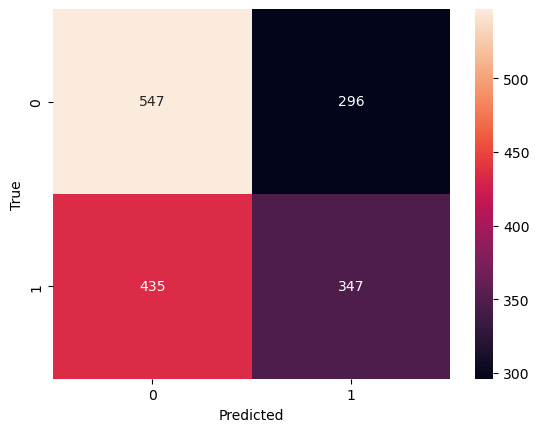

In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, predictions))

print("\nClassification Report:\n", classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Analysis and Conclusions

## Overall Accuracy
- The model has an **accuracy of approximately 55%**. This indicates it correctly predicts whether a mushroom is edible or poisonous 55% of the time. While this is better than random guessing, the accuracy is not sufficiently high for practical applications, especially in a context as critical as mushroom edibility.

## Precision and Recall
- **Precision** for predicting edible mushrooms (class 0) is slightly higher than for poisonous mushrooms (class 1). This suggests that when the model predicts a mushroom is edible, it is somewhat more likely to be correct compared to its predictions about poisonous mushrooms.
- **Recall** for edible mushrooms is higher compared to poisonous ones, indicating that the model is more adept at identifying true positives for edible mushrooms.

## F1-Score
- The **F1-scores** are moderate for both classes, with edible mushrooms having a slightly higher score. This reflects a balanced performance between precision and recall, but also highlights the need for improvement.

## Implications
- The results imply that while odor and cap color have some predictive power, they might not be sufficient by themselves to make highly accurate predictions about mushroom edibility.
- The moderate accuracy, precision, and recall suggest that additional features or a more sophisticated model might improve the model's predictive ability.

## Further Analysis
- Consider investigating other features in the dataset or trying different machine learning models, like Random Forests or Support Vector Machines.
- Explore feature engineering possibilities, such as creating new features or interaction terms.
- Hyperparameter tuning of the current model might yield better results.

## Real-world Application
- Given the moderate accuracy, using this model in isolation for real-world decisions, such as foraging for mushrooms, could be risky. It might be more suited for initial screening or as a supplementary tool alongside expert knowledge.

## Conclusion
- This analysis serves as a starting point in using machine learning to predict mushroom edibility. However, the results indicate a need for further improvements for the model to be reliably used in practice. Exploring additional data, employing more complex modeling techniques, or combining machine learning insights with expert mycological knowledge could be potential next steps.


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))

Gradient Boosting Accuracy: 0.5340909090909091


In [23]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC())
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
stack_model.fit(X_train_scaled, y_train)
stack_predictions = stack_model.predict(X_test_scaled)

print("Stacking Model Accuracy:", accuracy_score(y_test, stack_predictions))

Stacking Model Accuracy: 0.5340909090909091


In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit a model on the polynomial features
gb_model_poly = GradientBoostingClassifier(random_state=42)
gb_model_poly.fit(X_train_poly, y_train)
gb_predictions_poly = gb_model_poly.predict(X_test_poly)

print("Gradient Boosting with Polynomial Features Accuracy:", accuracy_score(y_test, gb_predictions_poly))

Gradient Boosting with Polynomial Features Accuracy: 0.5340909090909091


---

### Conclusion

This project embarked on the journey of using machine learning to predict the edibility of mushrooms based on attributes such as odor and cap color. Our analysis, rooted in data from the UCI Machine Learning Repository, utilized various techniques including logistic regression, gradient boosting, stacking classifiers, and polynomial feature transformations.

#### Key Findings:
- The exploratory data analysis revealed discernible patterns related to mushroom edibility based on the selected features. However, the transition to predictive modeling highlighted the challenges in achieving high accuracy.
- Despite employing a range of sophisticated machine learning models, our efforts consistently yielded an accuracy of around 53-55%. This suggests a limitation not in the modeling techniques but perhaps in the underlying data or the complexity of the problem itself.

#### Insights and Learnings:
- **Modeling Limitations:** The consistent accuracy across diverse models indicates that the predictive power of the available features (odor and cap color) may be inherently limited.
- **Data Complexity:** Mushroom edibility is likely influenced by a complex interplay of multiple factors, and capturing this with a few observable features is challenging.
- **Importance of Feature Selection:** This project underscores the critical role of feature selection and the need for comprehensive data to build effective predictive models.

#### Future Directions:
- **Data Augmentation:** Acquiring more data, especially with additional relevant features, could be a key step forward.
- **Domain Expertise:** Collaboration with mycologists or domain experts might provide new insights, leading to more informed feature selection and model development.
- **Alternative Approaches:** Exploring other data science techniques, such as deep learning or unsupervised learning, might yield different insights.

#### Final Thoughts:
This project, while not achieving high predictive accuracy, has been invaluable in understanding the challenges and nuances of applying machine learning to a real-world problem. It demonstrates that sometimes, the value lies not just in the results but in the journey and the learnings it provides.

---
